In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset
data = pd.read_csv("house.csv")

#Print the rows and columns of the data
print("Head of the dataset:")
print(data.head())

print("Tail of the dataset:")
print(data.tail())

Head of the dataset:
   bedroom_count    net_sqm  center_distance  metro_distance  floor  age  \
0              1  26.184098          1286.68      204.003817     22   67   
1              1  34.866901          1855.25      186.980360      8   30   
2              1  36.980709           692.09      111.224999     24   24   
3              1  17.445723          1399.49      237.998760      1   66   
4              1  52.587646            84.65      100.996400     20    3   

          price  
0  96004.804557  
1  92473.722568  
2  98112.519942  
3  92118.326874  
4  98976.653176  
Tail of the dataset:
      bedroom_count     net_sqm  center_distance  metro_distance  floor  age  \
4303              9  175.166533          1299.71      217.739012      2    5   
4304              6  215.352151          1346.36       77.724676     14    5   
4305              5  299.563972          1585.37      235.537881      3    5   
4306              1   29.193907          1896.23      147.223827      4  

# Question 1: What are the mean and median prices of houses?

In [14]:
mean_price = data['price'].mean()
median_price = data['price'].median()

print("Mean price is :", mean_price, "\nMedian price is:", median_price)

Mean price is : 95701.19618504886 
Median price is: 95337.79291764494


# Question 2: What is the total net square meters available in the dataset?

In [17]:
total_sqm = data['net_sqm'].sum().round(2)
print("Total Net Square Meters:", total_sqm)

Total Net Square Meters: 512399.24


# Question 3: What is the disrtibution of house prices (Histogram)?

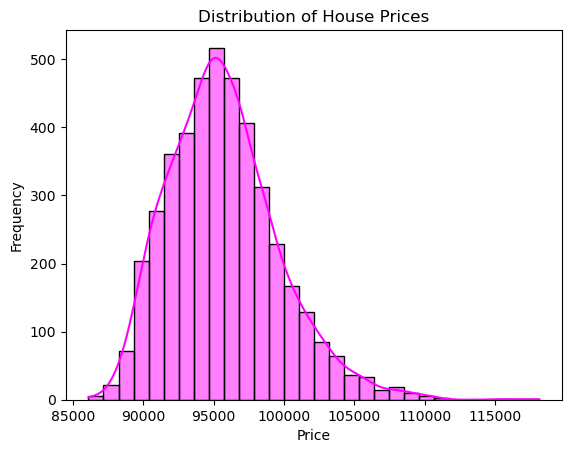

In [108]:
sns.histplot(data['price'], kde=True, bins=30, color='magenta')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

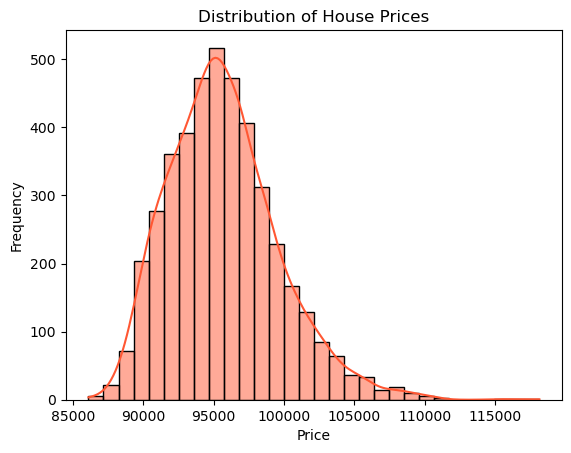

In [36]:
#Code for changing colors
#hex code ('#FF5733')
#RGB tuples ('0.1', '0.2', '0.5') values between 0-1


sns.histplot(data['price'], kde=True, bins=30, color='#FF5733')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Question 4: Is there a correlation between house price and distance to the city centre?

Correlation between Price and Centre Distance: -0.42


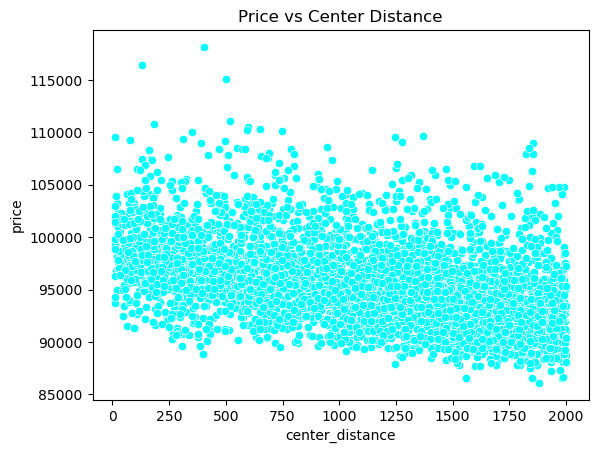

In [107]:
correlation = data['price'].corr(data['center_distance']).round(2)
print("Correlation between Price and Centre Distance:", correlation)

sns.scatterplot(x='center_distance', y='price', data=data, color='cyan')
plt.title("Price vs Center Distance")
plt.show()

# Question 5: What is the mean price of houses based on the number of bedrooms?

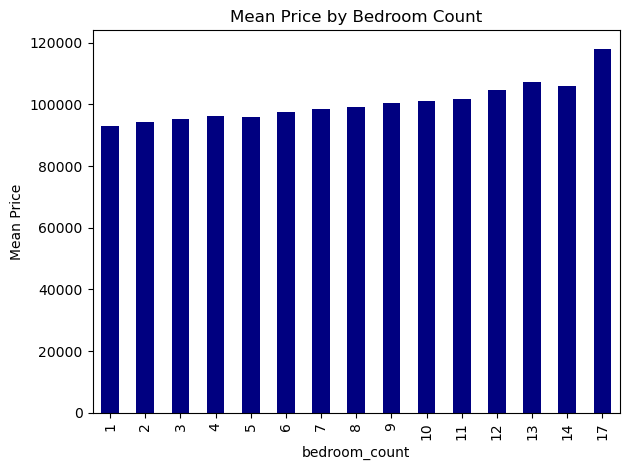

In [106]:
mean_price_by_bedrooms = data.groupby('bedroom_count')['price'].mean()
mean_price_by_bedrooms.plot(kind='bar', color='navy')
plt.title("Mean Price by Bedroom Count")
plt.ylabel("Mean Price")
plt.tight_layout()
plt.show()

# Questioin 6: What percentage of houses have different bedroom counts?

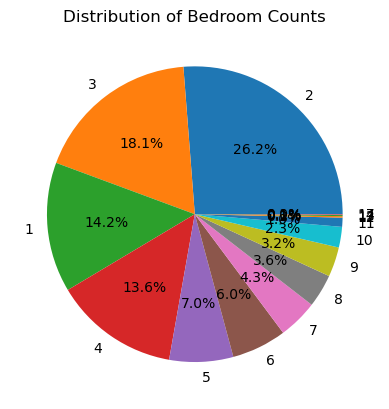

In [57]:
bedroom_counts = data['bedroom_count'].value_counts()
bedroom_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Bedroom Counts")
plt.ylabel("")
plt.show()

# Question 7: Visualize the average price of houses on different floors using a bar chart.

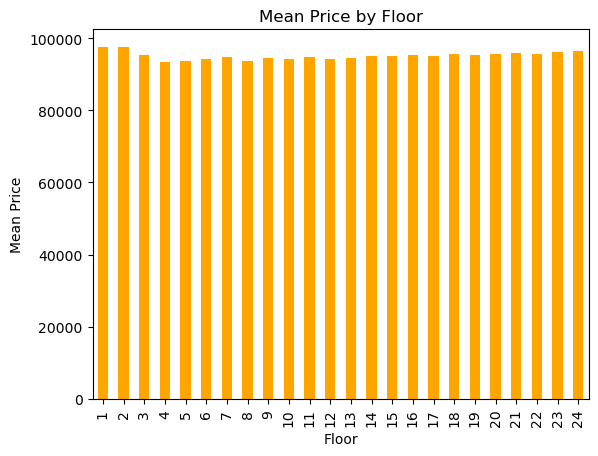

In [58]:
mean_price_by_floor = data.groupby('floor')['price'].mean()
mean_price_by_floor.plot(kind='bar', color='orange')
plt.title("Mean Price by Floor")
plt.xlabel("Floor")
plt.ylabel("Mean Price")
plt.show()

# Question 8: Visualize the average price of houses based on their age groups (0-10, 11-20 years)?

age_group
0-10     97430.46
11-20    96576.00
21-30    96202.63
31-40    96265.91
41-50    96033.10
50+      94829.47
Name: price, dtype: float64


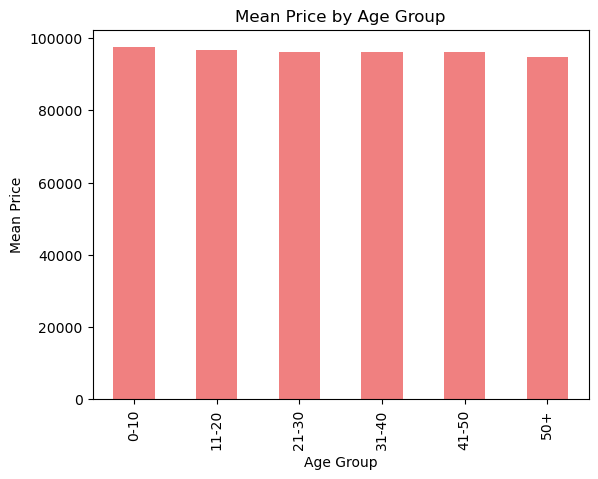

In [105]:
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
mean_price_by_age_group = data.groupby('age_group')['price'].mean().round(2)
print(mean_price_by_age_group)
mean_price_by_age_group.plot(kind='bar', color='lightcoral')
plt.title("Mean Price by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Price")
plt.show()

# Question 9: Which 10 houses have the highest prices, and which 10 have the lowest?

In [65]:
top_10 = data.nlargest(10, 'price')
bottom_10 = data.nsmallest(10, 'price')
print("\nTop 10 Houses by Price:\n", top_10)
print("\nBottom 10 Houses by Price:\n", bottom_10)


Top 10 Houses by Price:
       bedroom_count     net_sqm  center_distance  metro_distance  floor  age  \
3530             17  750.971604           402.62       40.985933      1   80   
3476             11  526.436077           128.82      108.896275      2    2   
3527             14  600.285032           499.92       84.714882      1    2   
3525             13  421.131808           516.61       88.527324      1    4   
3517             12  547.095715           181.35       79.218997      2   94   
3522             13  513.474154           597.98       48.768074      2   53   
4044              9  528.854761           648.94      169.958181      1   39   
4116              8  286.225065           595.10      118.868364      1   31   
3489             11  450.144794           747.95      146.169911      1   43   
4135              9  329.513333           349.59       26.753434      1   29   

              price age_group  
3530  118134.771190       50+  
3476  116379.466909      0-10

# Question 10: What is the average price per square meter of houses?

In [71]:
price_per_sqm = data['price'] / data['net_sqm']
mean_price_per_sqm = price_per_sqm.mean()
print("Average Price per Square Meter:", mean_price_per_sqm)

Average Price per Square Meter: 1413.938358533115


# Question 11: What is the mean metro distance for houses priced above and below the median price?

In [74]:
median_price = data['price'].median()
above_median = data[data['price'] > median_price]['metro_distance'].mean()
below_median = data[data['price'] <= median_price]['metro_distance'].mean()
print("Mean Metro Distance Above Median Price:", above_median)
print("Mean Metro Distance Below Median Price:", below_median)

Mean Metro Distance Above Median Price: 96.75677673999863
Mean Metro Distance Below Median Price: 114.57393979994949


# Question 12: Create a heatmap to show correlations between numerical columns.

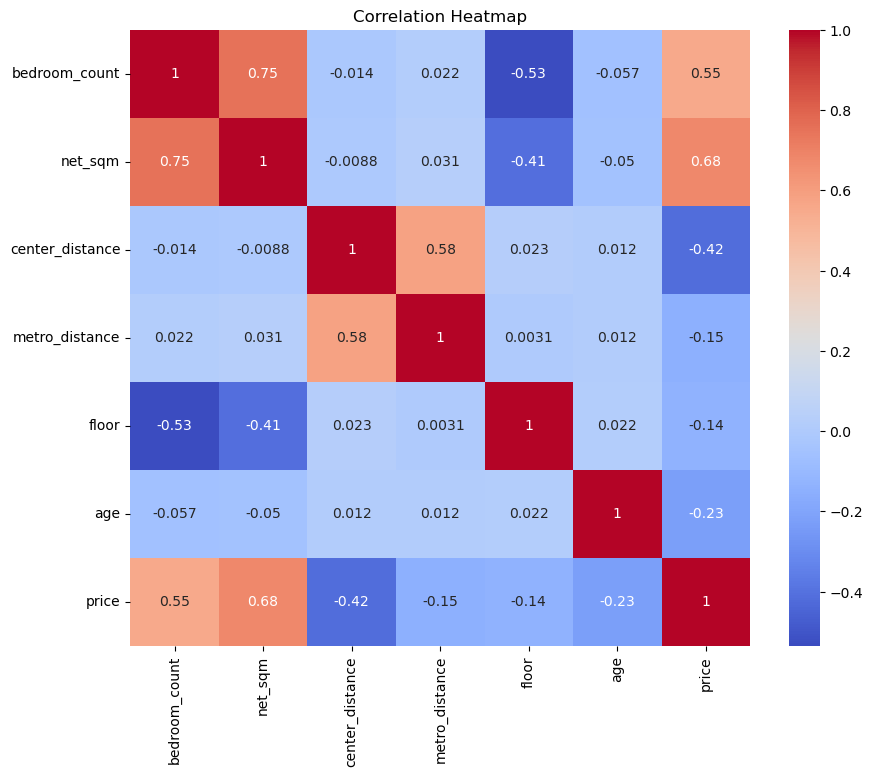

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Question 13:Identify houses with unusually hogh or low prices (using box plots or interquartile ranges).

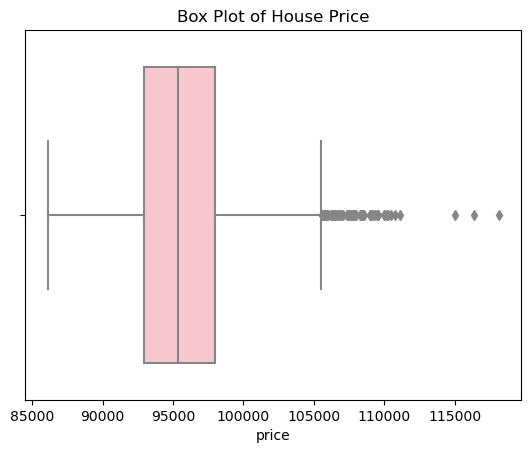

In [78]:
sns.boxplot(x=data['price'], color='pink')
plt.title("Box Plot of House Price")
plt.show()

# Question 14: What is the cumulative sum of prices across the dataset?

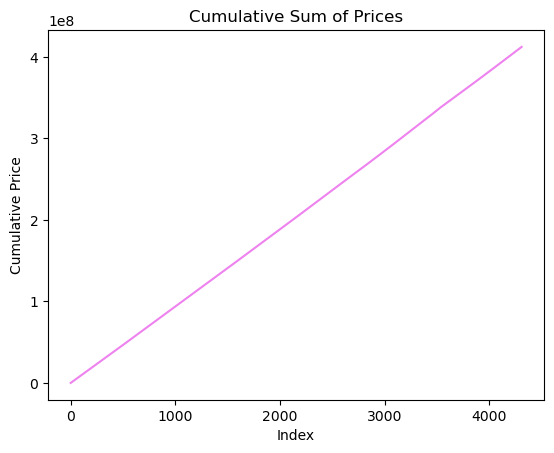

In [104]:
cumulative_prices = data['price'].cumsum()
plt.plot(cumulative_prices, color='violet')
plt.title("Cumulative Sum of Prices")
plt.xlabel("Index")
plt.ylabel("Cumulative Price")
plt.show()

# Question 15: How are houses distributed across different floors?

<function matplotlib.pyplot.show(close=None, block=None)>

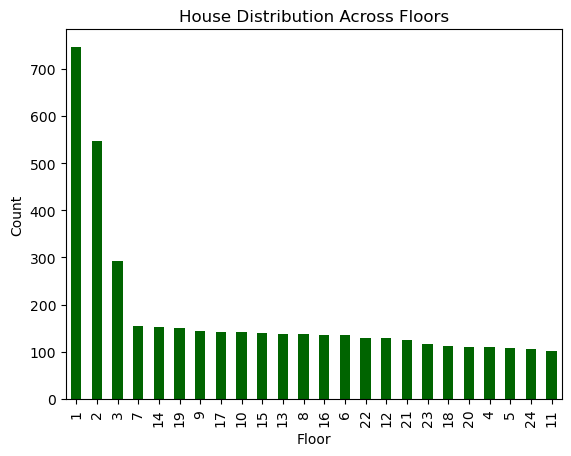

In [103]:
floor_distribution = data['floor'].value_counts()
floor_distribution.plot(kind='bar', color='darkgreen')
plt.title("House Distribution Across Floors")
plt.xlabel("Floor")
plt.ylabel("Count")
plt.show

# Question 16: Plot a scatter plot of price vs. net square meters.

<function matplotlib.pyplot.show(close=None, block=None)>

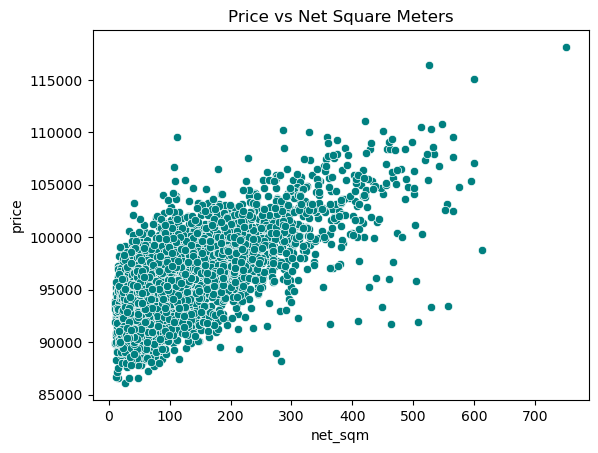

In [102]:
sns.scatterplot(x='net_sqm', y='price', color='teal', data=data)
plt.title("Price vs Net Square Meters")
plt.show

# Question 17: Can houses be clustered into groups based on their features like price, age, and size?

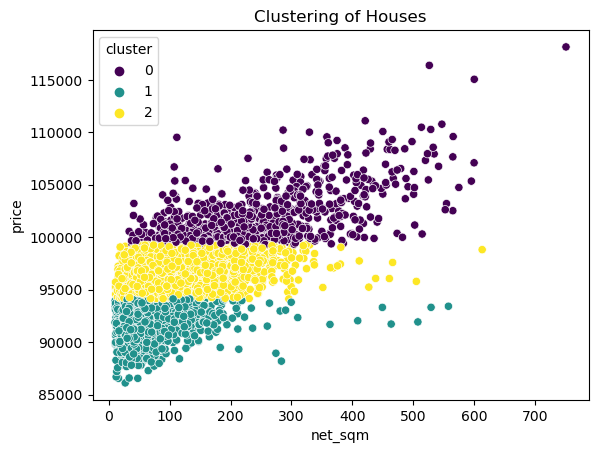

In [88]:
from sklearn.cluster import KMeans

features = data[['price', 'net_sqm', 'age']]
Kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
data['cluster'] = Kmeans.labels_

sns.scatterplot(x='net_sqm', y='price', hue='cluster', data=data, palette='viridis')
plt.title("Clustering of Houses")
plt.show()

# Question 18: What is the trend of houses prices as the distance from the city centre increases?

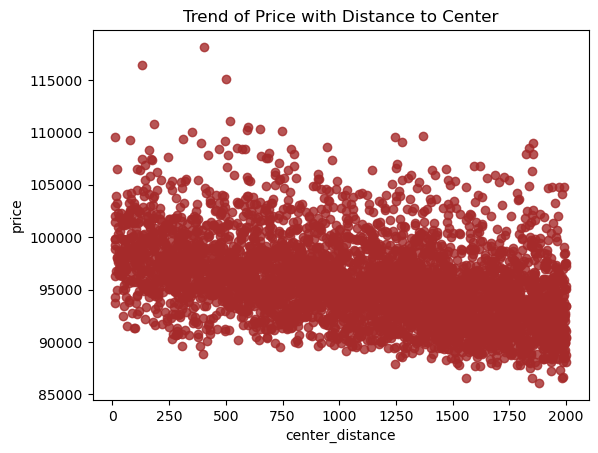

In [100]:
sns.regplot(x='center_distance', y='price', color='brown', data=data)
plt.title("Trend of Price with Distance to Center")
plt.show()

# Question 19: Count the number of houses within various price ranges (eg: <100k, 100k-200k).

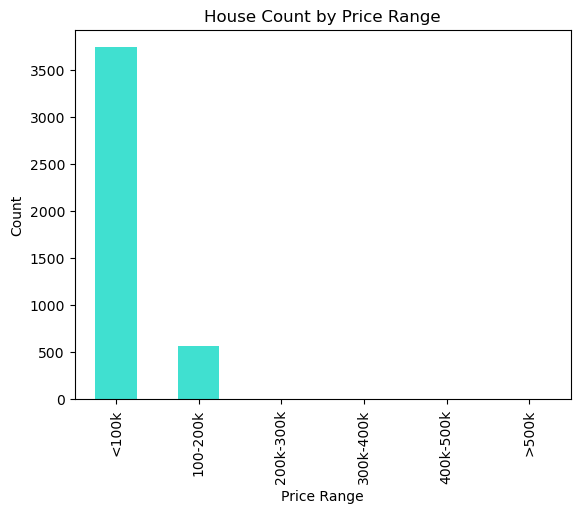

In [96]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 1e6]
labels = ['<100k', '100-200k', '200k-300k', '300k-400k', '400k-500k', '>500k']
data['price_range'] = pd.cut(data['price'], bins=bins, labels=labels)
price_range_counts = data['price_range'].value_counts()
price_range_counts.plot(kind='bar', color='turquoise')
plt.title("House Count by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

# Question 20: Create a density plot to visualize the distributioin of house prices.

<function matplotlib.pyplot.show(close=None, block=None)>

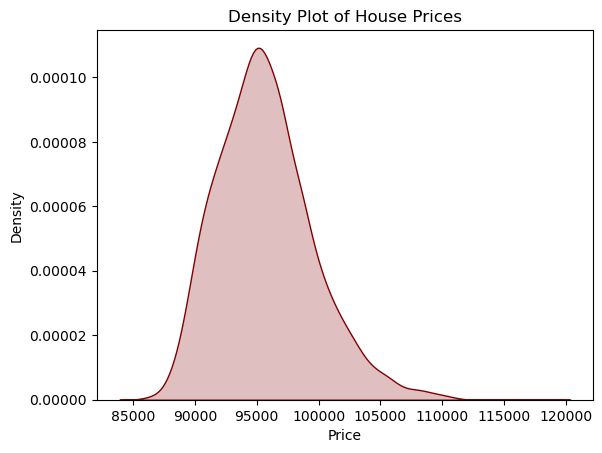

In [99]:
sns.kdeplot(data['price'], shade=True, color='maroon')
plt.title("Density Plot of House Prices")
plt.xlabel("Price")
plt.show